<a href="https://colab.research.google.com/github/lucaskydelima/Cluster-Analysis-in-Python/blob/main/Fuzzy_C_means_clustering_exercise_p5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
N = 900
D = 2
s = 4
mu = np.array([
    [0,0],
    [0,s],
    [s,s]
])

X = np.zeros((N,D))

X[:300,] = np.random.randn(300, D) + mu[0]
X[300:600,] = np.random.randn(300, D) + mu[1]
X[600:900,] = np.random.randn(300, D) + mu[2]

X

array([[-4.99022114e-03, -1.87987758e+00],
       [ 1.00129010e+00, -1.55559768e+00],
       [-1.08389243e+00, -1.68936135e-01],
       ...,
       [ 3.08799065e+00,  5.70139622e+00],
       [ 3.78385090e+00,  3.55061626e+00],
       [ 3.38152826e+00,  5.27808285e+00]])

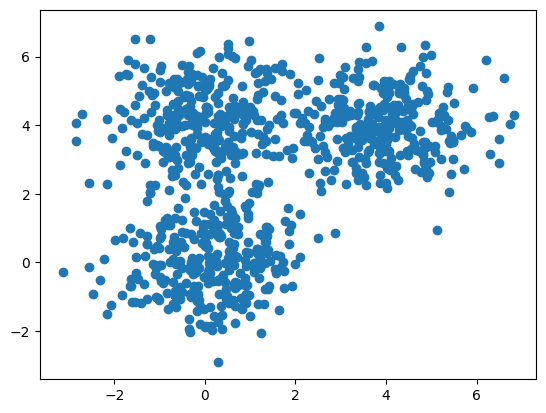

In [56]:
plt.scatter(x=X[:,0], y=X[:,1])

In [57]:
np.random.permutation(X)[:3]

array([[0.30028613, 2.20516613],
       [0.433044  , 1.9948092 ],
       [0.03591277, 4.53995787]])

In [58]:
def cost(X, R, M):
  cost = 0
  for k in range(len(M)):
    for n in range(len(X)):
      cost += R[n,k]*d(M[k],X[n])
  return cost

def d(u,v):
  diff = u-v
  return diff.dot(diff)

def plot_k_means(X, K, max_iter=20, beta=1.0):
  N, D = X.shape
  M = np.zeros((K,D))
  R = np.zeros(((N,K)))
  costs = np.zeros(max_iter)

  for k in range(K):
    M[k] = X[np.random.choice(N)]

  for i in range(max_iter):
    for k in range(K):
      for n in range(N):
        R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum(np.exp(-beta*d(M[j], X[n])) for j in range(K))

    costs[i] = cost(X, R, M)
    print(f"Cost function on step {i} = {costs[i]}")

    for k in range(K):
      M[k] = R[:,k].dot(X) / R[:,k].sum()

    if i > 0:
      if np.abs(costs[i] - costs[i-1]) < 0.1:
        print(f"Converged on step {i}")
        break
  
  plt.plot(costs)
  plt.title("Costs")
  plt.show()

  random_colors = np.random.random((K,3))
  colors = R.dot(random_colors)
  plt.scatter(x=X[:,0], y=X[:,1], c=colors)
  plt.show()

<ipython-input-58-eef3a0fb2382>:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum(np.exp(-beta*d(M[j], X[n])) for j in range(K))


Cost function on step 0 = 3966.215860586835
Cost function on step 1 = 2636.46224278204
Cost function on step 2 = 1876.2924063377725
Cost function on step 3 = 1719.2397286782523
Cost function on step 4 = 1706.5106444172995
Cost function on step 5 = 1705.3079400829827
Cost function on step 6 = 1705.1624435065796
Cost function on step 7 = 1705.1365035230403
Converged on step 7


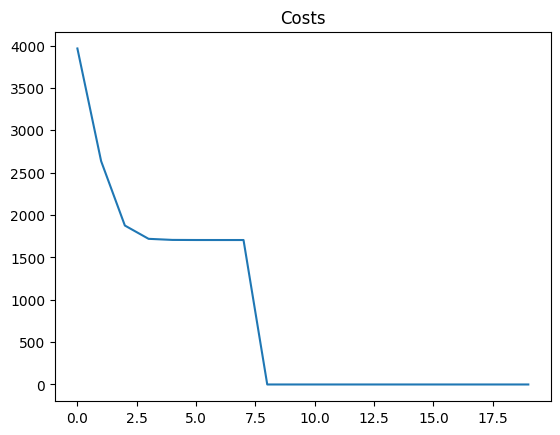

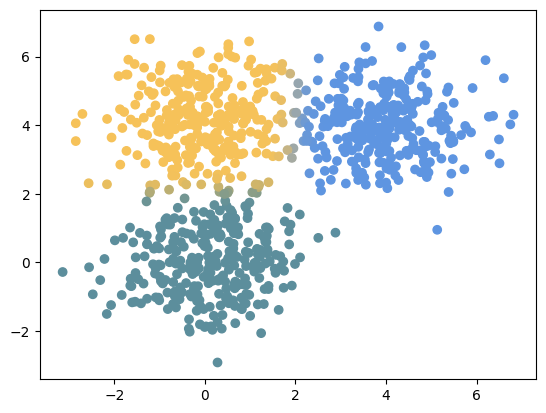

In [59]:
K = 3
plot_k_means(X, K)

<ipython-input-58-eef3a0fb2382>:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum(np.exp(-beta*d(M[j], X[n])) for j in range(K))


Cost function on step 0 = 11809.823957539928
Cost function on step 1 = 4224.896581815511
Cost function on step 2 = 3667.907320496298
Cost function on step 3 = 3127.32258734221
Cost function on step 4 = 2157.2560827709062
Cost function on step 5 = 1551.2869629653712
Cost function on step 6 = 1450.3788038716475
Cost function on step 7 = 1429.0933492704949
Cost function on step 8 = 1421.0986542032142
Cost function on step 9 = 1418.0501530051868
Cost function on step 10 = 1416.8292129203865
Cost function on step 11 = 1416.3054466274334
Cost function on step 12 = 1416.080038656707
Cost function on step 13 = 1415.9914595087462
Converged on step 13


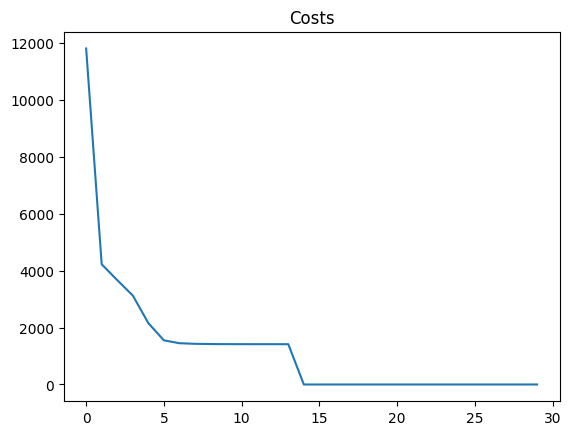

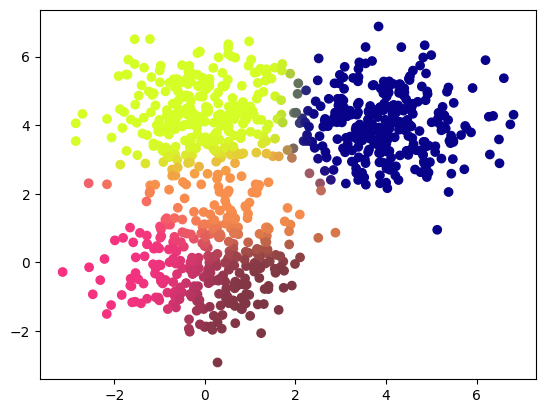

In [60]:
K = 5
plot_k_means(X, K, max_iter=30)

<ipython-input-58-eef3a0fb2382>:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum(np.exp(-beta*d(M[j], X[n])) for j in range(K))


Cost function on step 0 = 2473.56525013685
Cost function on step 1 = 2062.721042761788
Cost function on step 2 = 2072.266658694644
Cost function on step 3 = 2082.270653257599
Cost function on step 4 = 2086.3178776609634
Cost function on step 5 = 2087.8012447147253
Cost function on step 6 = 2088.3304565597496
Cost function on step 7 = 2088.518250042691
Cost function on step 8 = 2088.5853991241547
Converged on step 8


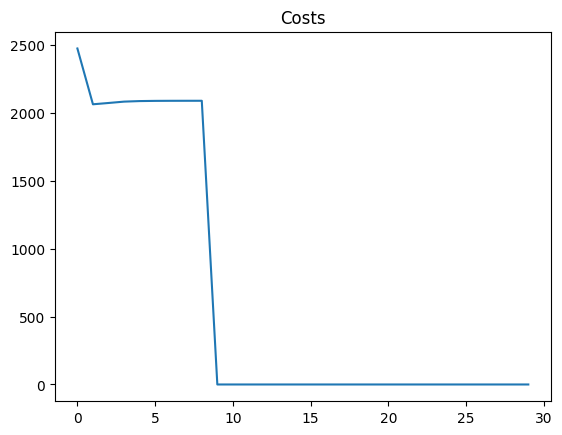

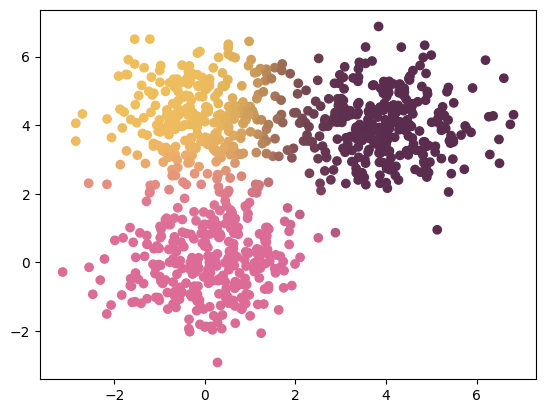

In [61]:
K = 5
plot_k_means(X, K, max_iter=30, beta=0.3)